<a href="https://colab.research.google.com/github/chenboju/DeepLearning/blob/main/4_keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 匯入必要的庫
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# 創建一個序貫模型
model = Sequential()

# 添加卷積層（Convolutional Layer）
# - filters: 設定 16 個卷積核，每個卷積核可以學習圖像中的不同特徵
# - kernel_size: 卷積核的大小是 5x5
# - input_shape: 輸入圖像的形狀是 28x28，並且具有單通道（灰度圖像）
# - activation: 使用 ReLU 激活函數
model.add(Conv2D(filters=16, kernel_size=(5, 5),
input_shape=(28, 28, 1), activation='relu')) #28x28 解析度

# 添加最大池化層（Max Pooling Layer）
# - pool_size: 池化窗口大小是 2x2，這將減小特徵圖的尺寸
model.add(MaxPooling2D(pool_size=(2,2)))

# 添加展平層（Flatten Layer）
# - 這一層將二維特徵圖轉換為一維向量，以便連接到全連接層
model.add(Flatten())

# 添加全連接層（Dense Layer）
# - 這一層具有 10 個單元，用於多類別分類（10 個數字的分類）
# - activation: 使用 softmax 激活函數，將輸出轉換為概率分佈
model.add(Dense(10, activation='softmax'))

# 顯示模型摘要（summary），顯示模型的結構和參數數量
model.summary()

# 編譯模型
# - optimizer: 使用 'rmsprop' 優化器，一種常用的優化器
# - loss: 使用 'categorical_crossentropy' 作為損失函數，用於多類別分類問題
# - metrics: 設置評估指標為準確性（accuracy）
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23466 (91.66 KB)
Trainable params: 23466 (91.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 匯入必要的庫
mnist = keras.datasets.mnist  # 匯入 MNIST 數據集

# 載入數據集
(train_data, train_label), (test_data, test_label) = mnist.load_data()
# train_data: 訓練數據圖像, train_label: 訓練數據標籤
# test_data: 測試數據圖像, test_label: 測試數據標籤

# 將測試標籤（test_label）保存到另一個變數（test_label_original）以便未來交叉分析使用
test_label_original = test_label

# 將訓練標籤（train_label）和測試標籤（test_label）進行 one-hot 編碼
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)
# One-Hot Encoding 將數字標籤轉換成二進制形式，以便多類別分類

# 現在，train_label 和 test_label 包含了 one-hot 編碼的標籤，可以用於深度學習模型的訓練。


In [8]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 6.4648 - accuracy: 0.7983
Epoch 2/10
118/118 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.9519
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1533 - accuracy: 0.9713
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9781
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9840
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9866
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0384 - accuracy: 0.9890
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0292 - accuracy: 0.9915
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0203 - accuracy: 0.9933

In [9]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1464 - accuracy: 0.9789
0.9789000153541565


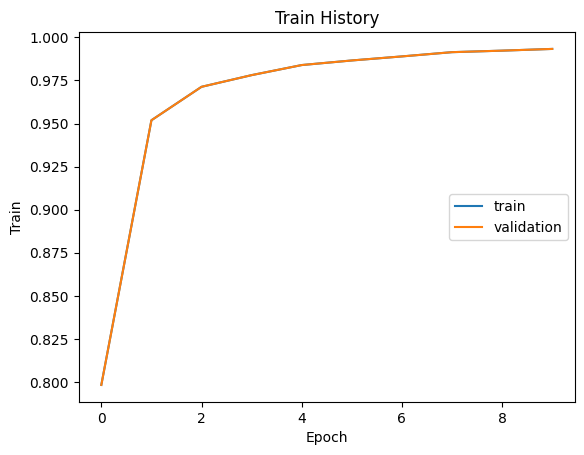

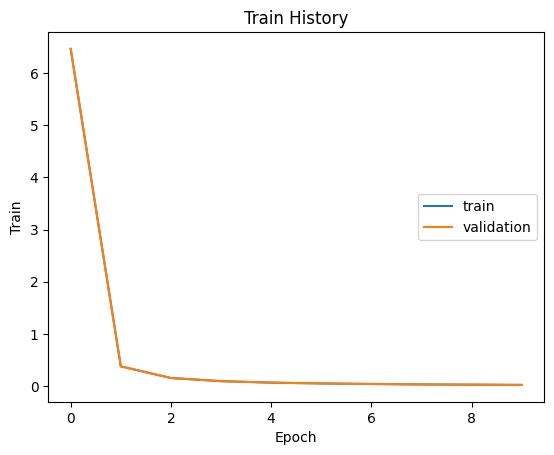

313/313 [==============================] - 1s 2ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,1,2,1,0,0
1,0,1132,2,1,0,0,0,0,0,0
2,6,3,1005,4,2,0,3,9,0,0
3,0,0,1,1003,0,4,0,1,1,0
4,0,1,1,0,957,0,5,2,0,16
5,1,0,0,6,0,884,1,0,0,0
6,6,2,0,3,3,7,937,0,0,0
7,0,2,7,1,1,1,0,1011,1,4
8,12,2,6,17,3,13,4,9,901,7


In [10]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])